In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [2]:
# Checking the number of mice.
merge_df.drop_duplicates(subset="Mouse ID")["Mouse ID"].count()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_id = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dupe_mice = merge_df[merge_df["Mouse ID"] == "g989"]
dupe_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
revised_study_df = merge_df[merge_df["Mouse ID"] != "g989"]
revised_study_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [6]:
# Checking the number of mice in the clean DataFrame.
revised_study_df.drop_duplicates(subset="Mouse ID")["Mouse ID"].count()

248

## Summary Statistics 

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Using the aggregation method, assemble the resulting series into a single summary dataframe.
regimen_groupby = revised_study_df.groupby('Drug Regimen')
drug_regimen_df = regimen_groupby.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
drug_regimen_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

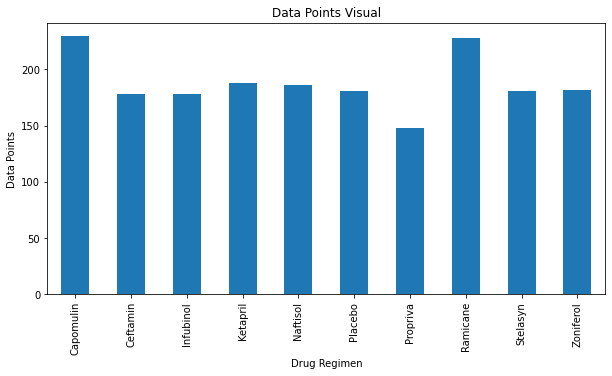

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_data_points = revised_study_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

regimen_data_points.plot(kind="bar", figsize=(10,5))

#set chart title
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

#show chart and set layout
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Data Points')

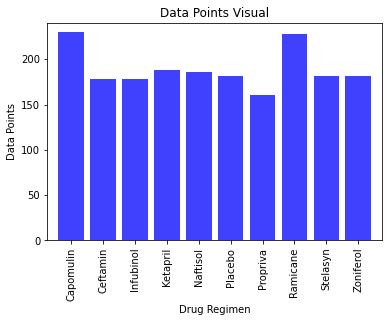

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = np.arange(len(regimen_data_points))

plt.bar(x_axis, users, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 
                            'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

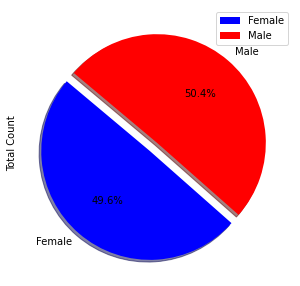

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = revised_study_df.groupby(["Mouse ID","Sex"])
mouse_gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

colors = ['blue', 'red']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, 
                             shadow = True, autopct="%1.1f%%")

(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

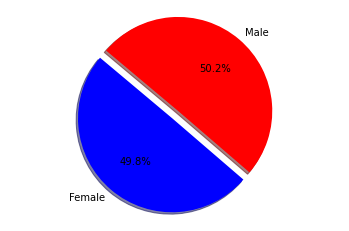

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
sizes = [49.799197,50.200803]

colors = ['blue', 'red']
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

##  Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = revised_study_df[revised_study_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = treatment_regimens.sort_values(["Timepoint"], ascending=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatment_regimens_df = treatment_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
treatment_regimens_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
top_treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in top_treatments:
    tumor_volume.append(treatment_regimens[treatment_regimens["Drug Regimen"] == x]["Tumor Volume (mm3)"])
    
    # add subset 
    top_regimens_sort = treatment_regimens.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

    # Determine outliers using upper and lower bounds
    quartiles = top_regimens_sort.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Determine upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

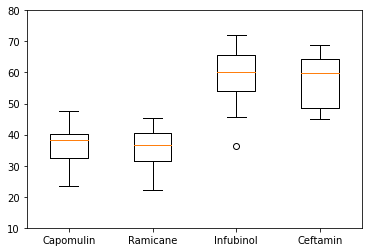

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = top_regimens_sort.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_treatments)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

##  Line and Scatter Plots

In [29]:
capomulin_mouse = revised_study_df.loc[revised_study_df['Mouse ID'] == 'v923']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
346,v923,Capomulin,Female,19,21,25,40.156413,1
347,v923,Capomulin,Female,19,21,30,40.752216,2
348,v923,Capomulin,Female,19,21,35,41.439242,2
349,v923,Capomulin,Female,19,21,40,42.151015,2
350,v923,Capomulin,Female,19,21,45,40.658124,2


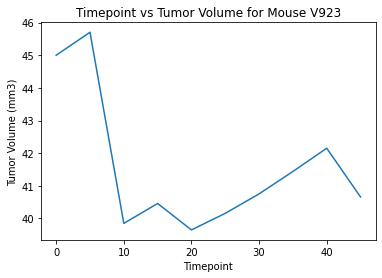

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = revised_study_df.loc[revised_study_df['Mouse ID'] == 'v923']

plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume for Mouse V923")
plt.show()

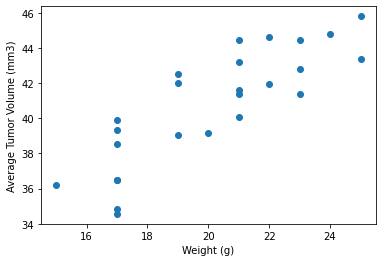

In [34]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_weight = revised_study_df.loc[revised_study_df['Drug Regimen'] == 'Capomulin']
capomulin_avg = capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

##  Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen